In [7]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np



In [6]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [8]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)
Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)
Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)
Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)
Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)
print("\n\n")

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [9]:
data=np.transpose([Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded,Play_encoded])

In [10]:
data = np.transpose([Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded])
column_name = ['Outlook','Temperature','Humidity','Wind']
data_frm = pd.DataFrame(data=data,columns=column_name)
data_frm

,Outlook,Temperature,Humidity,Wind
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [109]:
from sklearn.model_selection import train_test_split
x=data
y=Play_encoded
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)


In [110]:
x_test

array([[1, 1, 0, 0],
       [2, 2, 0, 1],
       [1, 2, 1, 1]])

In [111]:
from sklearn import metrics
from sklearn.metrics import  accuracy_score
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
clf=DecisionTreeClassifier(max_leaf_nodes=2,random_state=40)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [112]:
#3(3) Plot the decision tree generated by the model for weather dataset. What were the values of criterion, max_depth during model generation.
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

accuracy score:  0.3333333333333333


In [113]:
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

Precision:  0.3333333333333333


In [114]:
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


In [103]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix

from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[61,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 70,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0, 66,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0, 46,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 64,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [24,  0,  0,  0,  0,  0, 43,  0,  0,  0]])

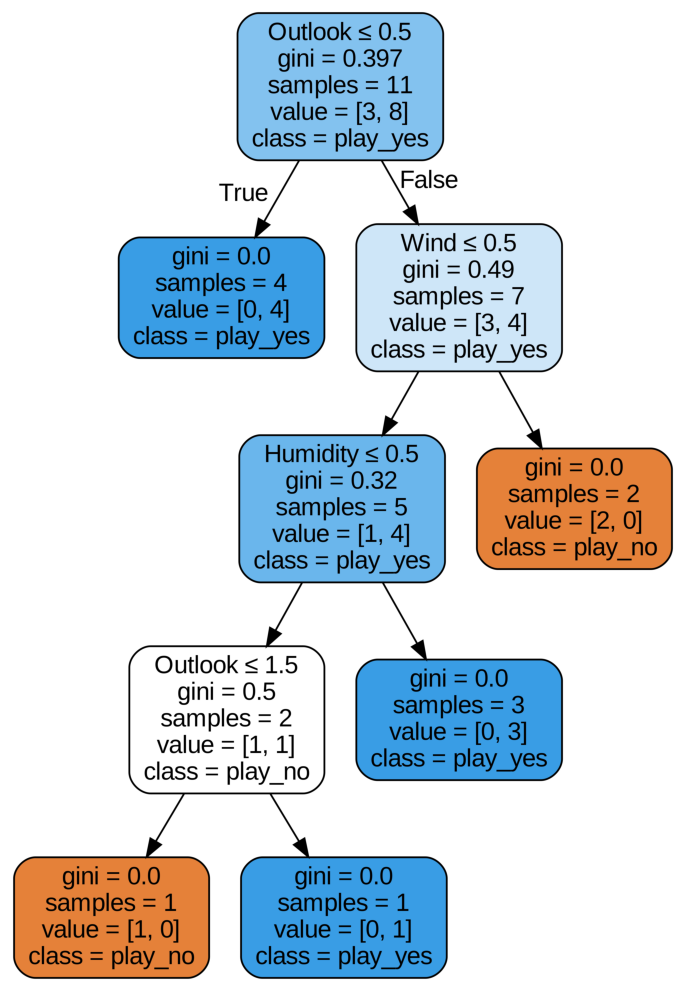

In [20]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=column_name,
                class_names=['play_no','play_yes'])

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


In [43]:
## 1What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?
"""Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}"""
clf.predict([[1,2,1,0]])



array([1])

In [44]:
#2What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?
clf.predict([[2,0,0,1]])

array([0])

In [45]:
#(6) Train weather dataset using Decision Tree Classifier with max_depth of the tree =2. Find out accuracy, precision and recall of the trained model.
from sklearn import metrics
clf=DecisionTreeClassifier(max_depth=2,random_state=40)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [46]:
from sklearn.model_selection import train_test_split
x=data
y=Play_encoded
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=40)


In [47]:
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

accuracy score:  0.7142857142857143


In [48]:
from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[2, 1],
       [1, 3]])

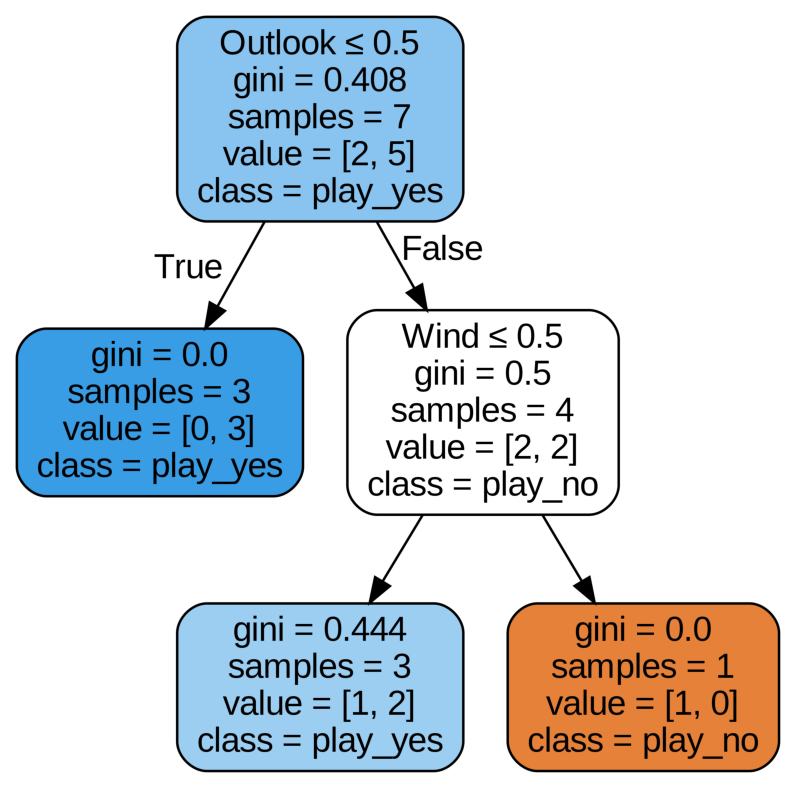

In [49]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=column_name,
                class_names=['play_no','play_yes'])

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


In [50]:
#7Implement the Decision Tree classifier on Iris dataset and find the ccp_alpha values associated with the decision tree generated.
from sklearn import datasets
import pandas  as pd

In [51]:
df=datasets.load_iris()

In [52]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [54]:
x=df.feature_names

In [55]:
x

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [56]:
y=df.target_names

In [57]:
y
x=df.data
y=df.target

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=1)

In [60]:
from sklearn import metrics
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [61]:
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

accuracy score:  0.9733333333333334


In [62]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix

from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[24,  0,  0],
       [ 0, 23,  1],
       [ 0,  1, 26]])

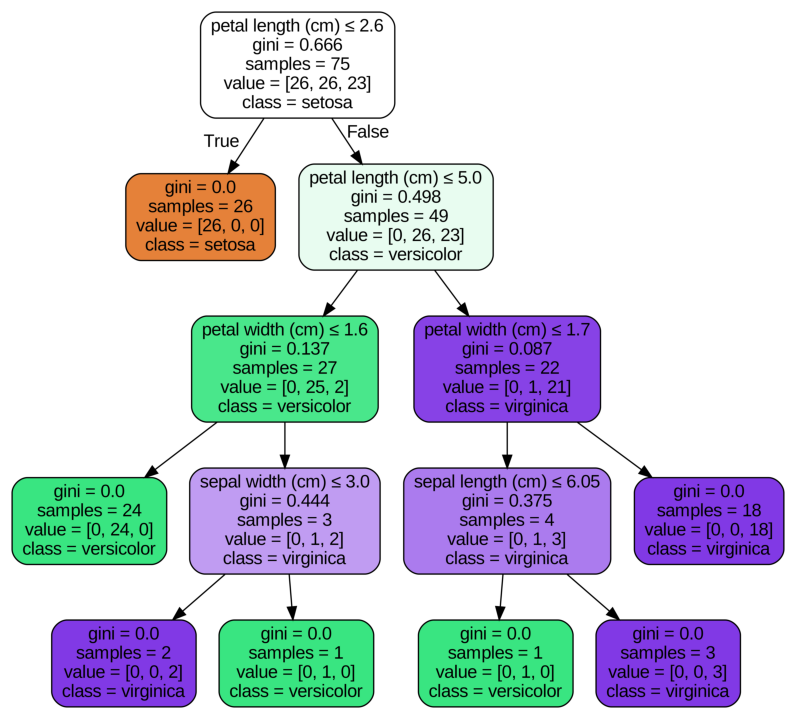

In [63]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=list(df.feature_names),class_names=list(df.target_names))

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=1)
from sklearn import metrics
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [ ]:
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

In [65]:
#Import confusion_matrix from scikit-learn metrics module for confusion_matrix

from sklearn.metrics import confusion_matrix
print("confusion matrix : \n")
confusion_matrix(y_test, y_pred)

confusion matrix : 



array([[24,  0,  0],
       [ 0, 24,  0],
       [ 0,  7, 20]])

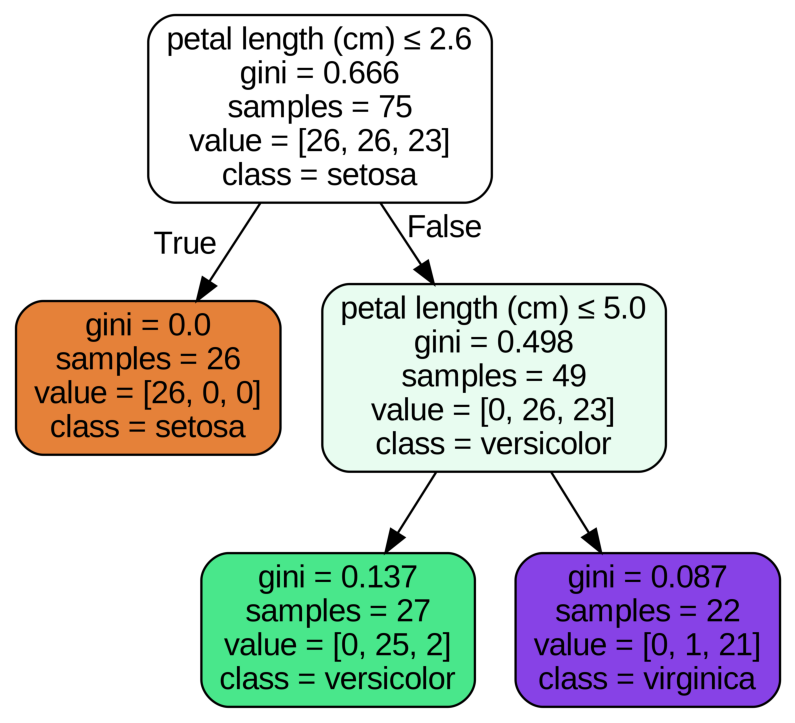

In [66]:
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=list(df.feature_names),class_names=list(df.target_names))

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();


In [67]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [68]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [69]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [70]:
ccp_alphas

array([0.        , 0.00869963, 0.01339286, 0.03571429, 0.26539835,
       0.33279549])

In [71]:
clfs = []
acc=[]
for ccp_alpha in ccp_alphas:
   clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
   clf.fit(X_train, y_train)
   y_pred=clf.predict(X_test)
   acc1=metrics.accuracy_score(y_test,y_pred)
   acc.append(acc1)
   clfs.append(clf)
print(
"Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1]
)
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.332795493197279


In [ ]:
print(acc)
print(clfs)

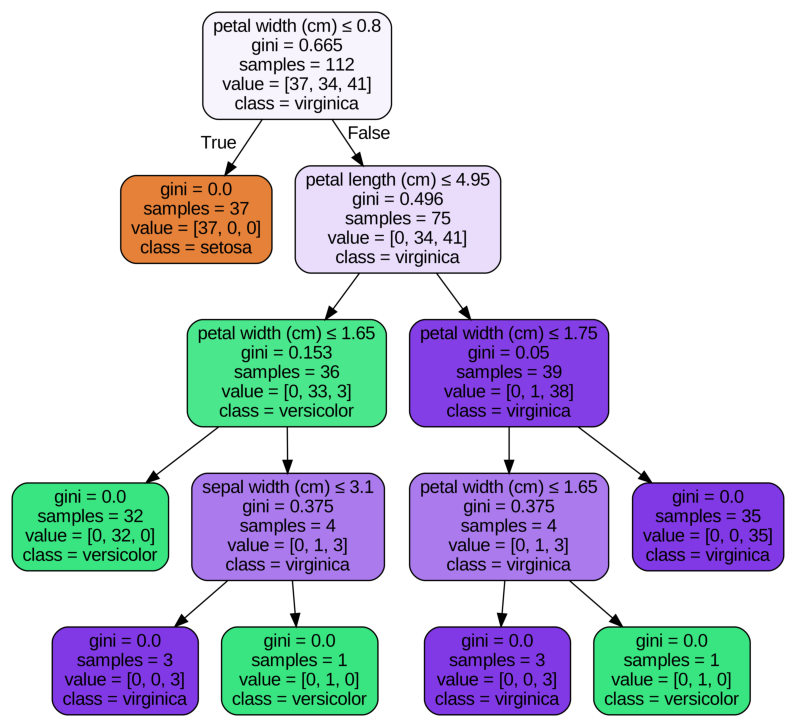

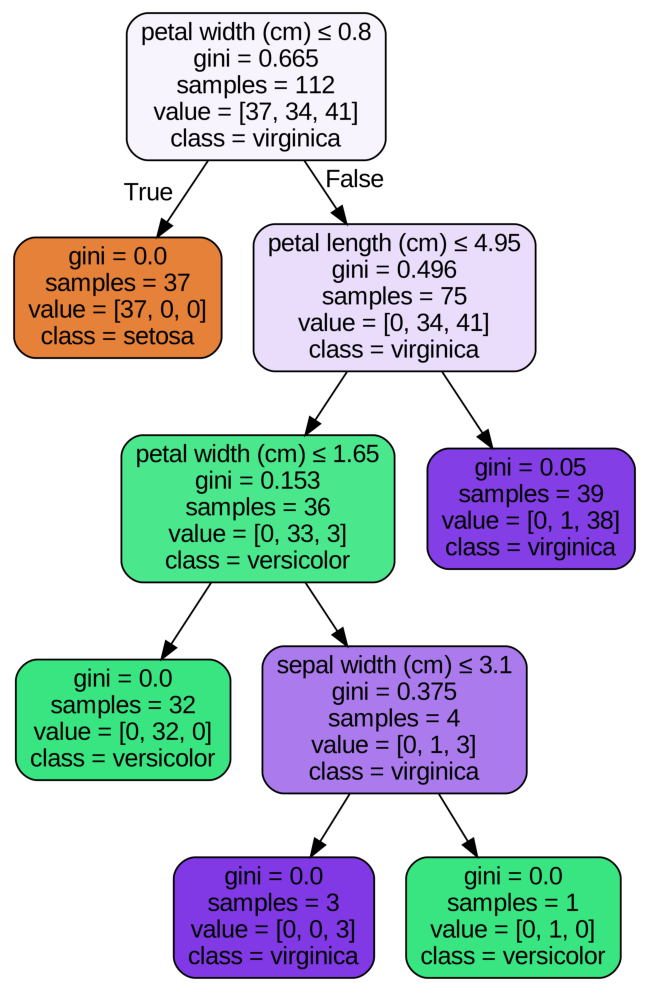

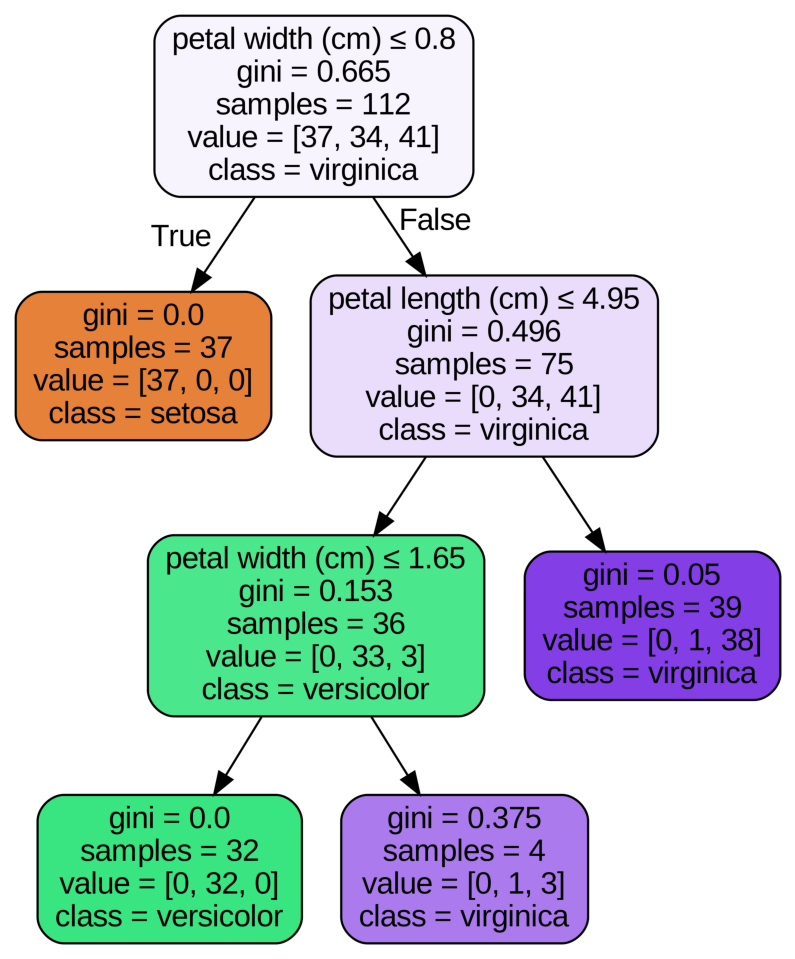

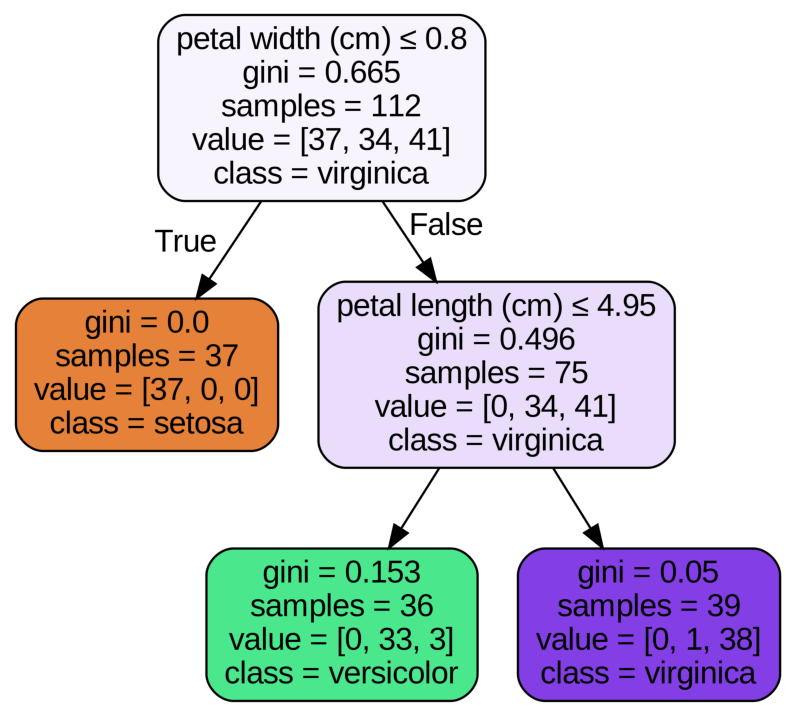

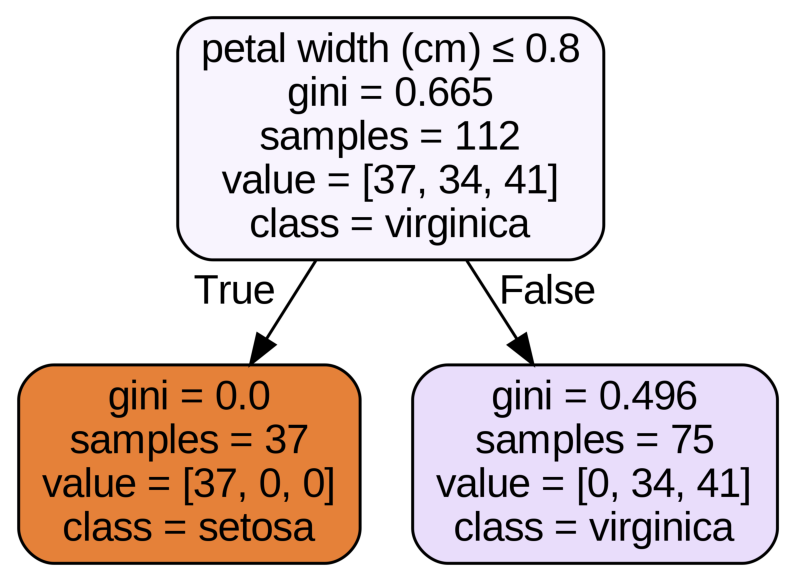

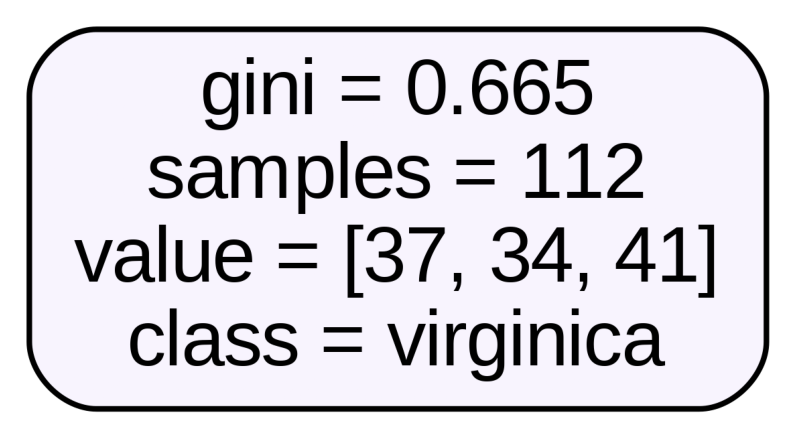

In [72]:
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt
for clf in clfs:
  export_graphviz(clf,out_file='tree_entropy.dot',filled=True,
                rounded=True,special_characters=True,
                feature_names=list(df.feature_names),class_names=list(df.target_names))

# Convert to png
  call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png','-Gdpi=600'])

# Display in python

  plt.figure(figsize = (14, 18))
  plt.imshow(plt.imread('tree_entropy.png'))
  plt.axis('off');
  plt.show();




# Task 2

In [73]:
from sklearn import datasets
import pandas  as pd

In [87]:
df=datasets.load_digits()

In [88]:
df

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [89]:
x=df.feature_names

In [90]:
x

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [91]:
y=df.target_names

In [92]:
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
x=df.data
y=df.target

In [94]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [82]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.34,random_state=1)

In [96]:
from sklearn import metrics
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [97]:
print("accuracy score: ",metrics.accuracy_score(y_test,y_pred))

accuracy score:  0.8412438625204582


In [99]:
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

ValueError: ignored